In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) ##### SO THE DATAFRAME DOES NOT TRUNCATE
%matplotlib inline

In [400]:
df=pd.read_csv('TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [401]:
df.shape

(7043, 21)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [403]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [404]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [405]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [406]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [407]:
df=df.dropna() ##### 11 ROWS DROPPED

In [408]:
df.shape

(7032, 21)

In [409]:
df.drop(columns=['customerID'], inplace=True)

In [410]:
df["Churn"].value_counts(normalize=True) ##### DATASET IMBALENCED

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

This shows that the dataset is imbalenced.

In [411]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [412]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

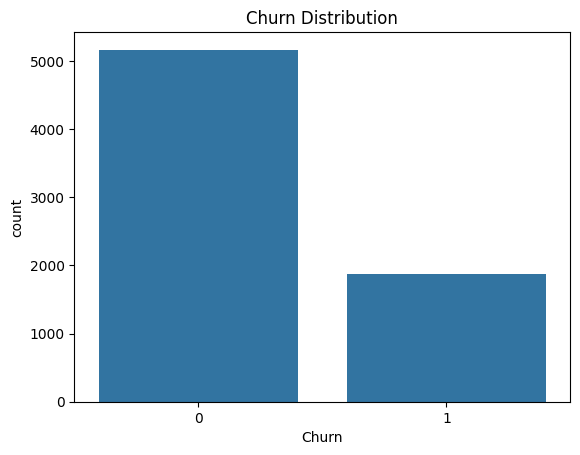

In [413]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

Out of all the features there are three numeric feature that are tenure, MonthlyCharges, Total Charges

In [414]:
df.groupby("tenure")["Churn"].mean().head(10)

tenure
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
6     0.363636
7     0.389313
8     0.341463
9     0.386555
10    0.387931
Name: Churn, dtype: float64

In [415]:
df.groupby("tenure")["Churn"].mean().tail(10)

tenure
63    0.055556
64    0.050000
65    0.118421
66    0.146067
67    0.102041
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, dtype: float64

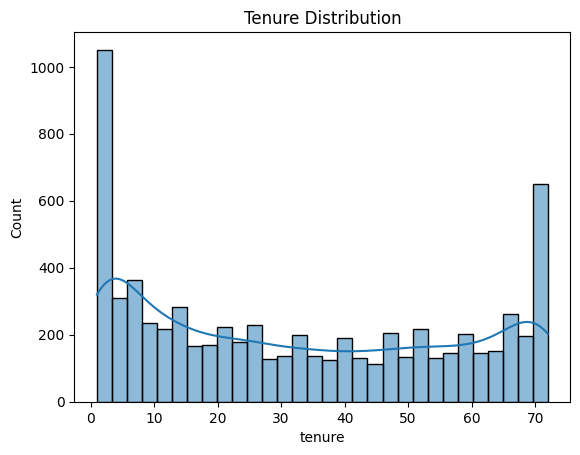

In [416]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

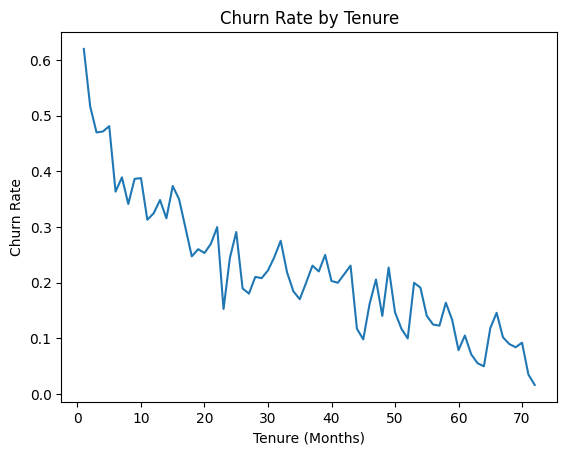

In [417]:
tenure_churn = df.groupby("tenure")["Churn"].mean()
plt.plot(tenure_churn)
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.show()

Customers with lower tenures are more likely to churn than the customers with longer and higher tenures.

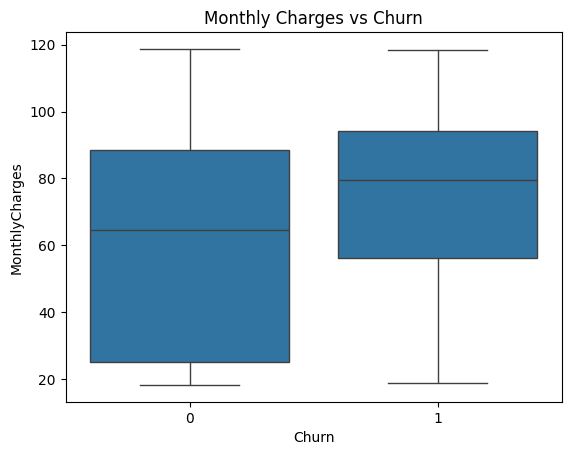

In [418]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Customers paying higher monthly charges show higher churn rates.

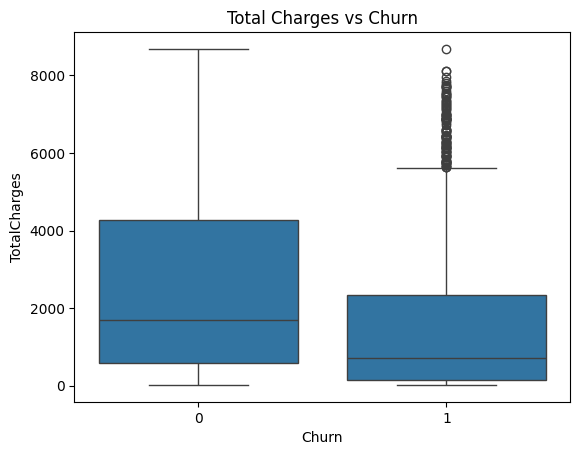

In [419]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

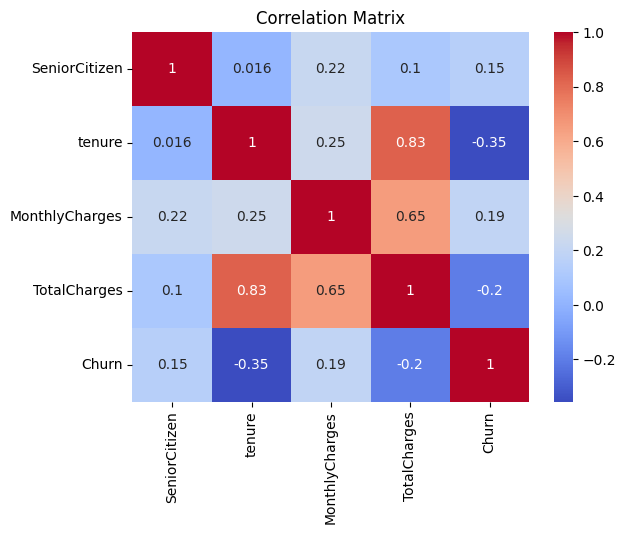

In [420]:
numeric_cols = df.select_dtypes(include=["int64","float64"])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [421]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
    print("\n", )
    print(churn_rate)



gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64


Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64


Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64


PhoneService
Yes    0.267475
No     0.250000
Name: Churn, dtype: float64


MultipleLines
Yes                 0.286485
No                  0.250812
No phone service    0.250000
Name: Churn, dtype: float64


InternetService
Fiber optic    0.418928
DSL            0.189983
No             0.074342
Name: Churn, dtype: float64


OnlineSecurity
No                     0.417787
Yes                    0.146402
No internet service    0.074342
Name: Churn, dtype: float64


OnlineBackup
No                     0.399417
Yes                    0.215670
No internet service    0.074342
Name: Churn, dtype: float64


DeviceProtection
No                     0.391403
Yes                    0.225393
No internet service    0.074342
Name: Churn, dtype: float64


TechSupport
No                   

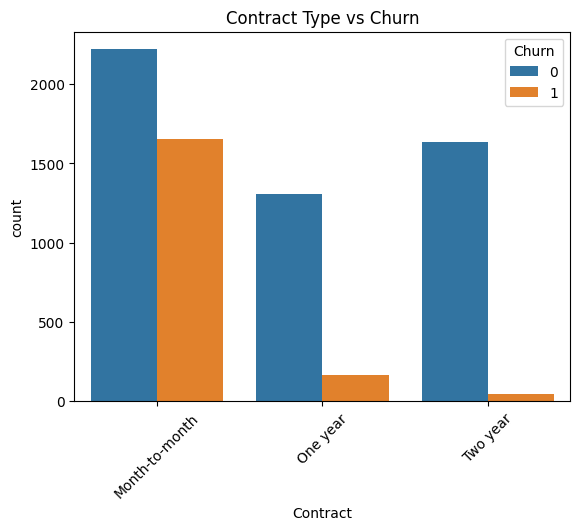

In [422]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()

The customers with month-to-month contract are more likely to churn.

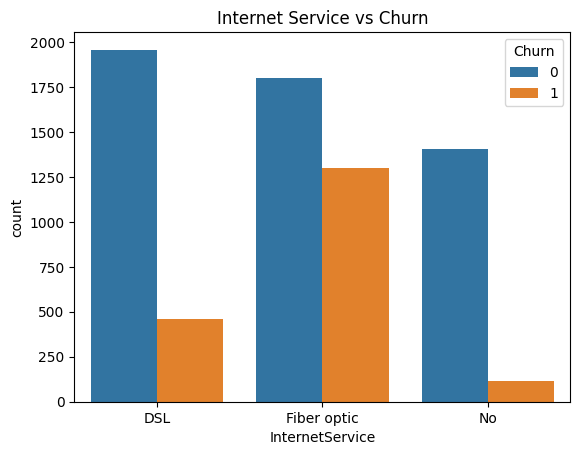

In [423]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()

The customers with Fiber Optic internet services are more likely to churn.

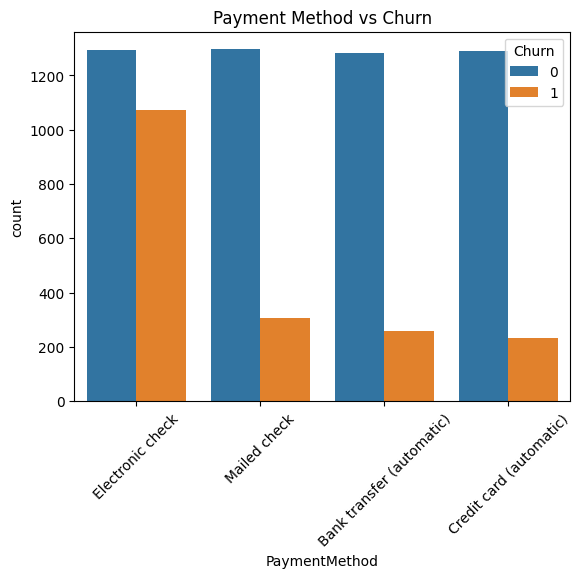

In [424]:
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

The customers that have their payment method as the electonic check are more likely to churn.

##### Key Insights

1. Month-to-month customers exhibit the highest churn (~43%).
2. Senior citizens show significantly higher churn (~42%).
3. Customers with low tenure have disproportionately high churn.
4. Higher monthly charges correlate with increased churn.
5. Electronic check users churn more frequently.

In [425]:
df.to_csv('telco_cleaned.csv', index=False)